In [1]:
import pandas as pd
import matplotlib.pyplot as plt

urls = [
    "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link",
    "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link",
    "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=drive_link",
    "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link"
]

file_names = ["df_prod.csv", "df_orders.csv", "df_orderlines.csv", "df_brands.csv"]

def read_csv_from_drive(url, file_name):
    path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
    return pd.read_csv(path)

df_prod, df_orders, df_orderlines, df_brands = [read_csv_from_drive(url, file_name) for url, file_name in zip(urls, file_names)]

df_prod.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


## **Make Copy of DataFrame**

In [2]:
df_orders_copy = df_orders.copy()
df_orderlines_copy = df_orderlines.copy()
df_prod_copy = df_prod.copy()
df_brands_copy = df_brands.copy()

## **1. Duplicates**

**Check duplicates in each dataframe and perfom cleaning steps if needed:**



In [3]:
df_orders_copy.duplicated().sum()

0

In [4]:
df_orderlines_copy.duplicated().sum()

0

In [5]:
df_prod_copy.duplicated().sum()

8746

**We have identified 8746 duplicates in the product dataframe. Considering this as the product catalog of ENIAC, we can safely remove all duplicates from this dataframe, as it will not impact the subsequent analysis.**

In [6]:
df_prod_copy = df_prod_copy.drop_duplicates()

In [7]:
df_brands_copy.duplicated().sum()

0

## **2 .info()**

In [8]:
df_orders_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [9]:
df_orderlines_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [10]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [11]:
df_brands_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


##**3.  Missing values**

In [12]:
df_orders_copy.isna().sum()

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [13]:
df_orderlines_copy.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [14]:
df_prod_copy.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [15]:
print(f"{(df_prod_copy.price.isna().sum())} missing values represents only {((df_prod_copy.price.isna().sum()/df_prod_copy.shape[0]*100).round(2))}% of the rows in products DataFrame")

46 missing values represents only 0.43% of the rows in products DataFrame


**Therefore, we decided to drop the 46 rows**

In [16]:
#Find the index of missing data in product dataframe
indices_with_nan_price = df_prod_copy[df_prod_copy['price'].isna()].index

In [17]:
#Drop the rows with missing data
df_prod_copy.drop(indices_with_nan_price, inplace=True)

In [18]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10527 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


In [19]:
df_brands_copy.isna().sum()

short    0
long     0
dtype: int64

##**4.  Datatypes**

#**4.1. Dates**

In [20]:
df_orders_copy["created_date"] = pd.to_datetime(df_orders_copy["created_date"])

In [21]:
df_orders_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [22]:
df_orderlines_copy["date"] = pd.to_datetime(df_orderlines_copy["date"])

In [23]:
df_orderlines_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


#**4.2. Prices**

## 4.2.1. Orders and orderlines

In [24]:
df_orderlines_copy.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()

unit_price
False    257814
True      36169
Name: count, dtype: int64

In [25]:
two_dot_percentage = ((df_orderlines_copy.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_orderlines_copy.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

The 2 dot problem represents 12.3% of the rows in our DataFrame


In [26]:
two_dot_order_ids_list = df_orderlines_copy.loc[df_orderlines_copy.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
df_orderlines_copy = df_orderlines_copy.loc[~df_orderlines_copy.id_order.isin(two_dot_order_ids_list)]

In [27]:
df_orderlines_copy.shape[0]

216250

In [28]:
df_orderlines_copy["unit_price"] = pd.to_numeric(df_orderlines_copy["unit_price"])

In [29]:
df_orderlines_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


In [30]:
df_orders_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


## 4.2.2. Product dataframe

## 4.2.2.1 Price

In [31]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10527 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


In [32]:
df_prod_copy.head(10)

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45,420.003,0,1230
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,146.471,0,1364
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,274.694,0,1364
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74,669.904,0,1364
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35,330.003,0,1325


In [33]:
df_prod_copy.tail()

,sku,name,desc,price,promo_price,in_stock,type
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392
19325,THU0063,"Enroute Thule 14L Backpack MacBook 13 ""Green",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392


In [34]:
df_prod_copy.price.str.contains("\d+\.\d+\.\d+").value_counts()

price
False    10157
True       377
Name: count, dtype: int64

In [35]:
two_dot_percentage_price_prod = ((df_prod_copy.price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_prod_copy.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage_price_prod}% of the rows in our DataFrame")

The 2 dot problem represents 3.58% of the rows in our DataFrame


We will drop all rows that have price with double dots

In [36]:
condition_to_drop = df_prod_copy['price'].str.contains("\d+\.\d+\.\d+")
df_prod_copy = df_prod_copy[~condition_to_drop]

In [37]:
df_prod_copy['price'] = pd.to_numeric(df_prod_copy['price'])

In [38]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10157 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10157 non-null  object 
 1   name         10157 non-null  object 
 2   desc         10151 non-null  object 
 3   price        10157 non-null  float64
 4   promo_price  10157 non-null  object 
 5   in_stock     10157 non-null  int64  
 6   type         10110 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 634.8+ KB


In [39]:
df_prod_copy['price'].mean()

663.1246286305011

##4.2.2.2. Promo_Price

In [40]:
df_prod_copy.promo_price.str.contains("\d+\.\d+\.\d+").value_counts()

promo_price
False    5836
True     4321
Name: count, dtype: int64

In [41]:
indices_with_double_dots_promoprice = df_prod_copy[df_prod_copy.promo_price.str.contains("\d+\.\d+\.\d+")].index

In [42]:
df_prod_copy_modified = df_prod_copy.copy()
df_prod_copy_modified.loc[indices_with_double_dots_promoprice, 'promo_price'] = df_prod_copy_modified.loc[indices_with_double_dots_promoprice, 'promo_price'].apply(lambda x: ''.join(x.rsplit('.', 1)))
df_prod_copy_modified.iloc[66]
df_prod_copy_modified['promo_price'] = pd.to_numeric(df_prod_copy_modified['promo_price'])
df_prod_copy_modified.loc[indices_with_double_dots_promoprice, 'promo_price'] *= 100
df_prod_copy_modified.sample(100)

,sku,name,desc,price,promo_price,in_stock,type
18673,TUC0315-A,"Open - Tucano 105 Pro Cosmo iPad Case ""Blue",Leather reconditioned trunnion up to 360 degre...,39.90,259.8440,0,12635403
14457,ELG0046,Eve Elgato Thermo thermostatic radiator valve,thermostatic valve controls the temperature of...,69.99,489.9050,0,11905404
15086,SAM0061-A,Open - Samsung Recorder External Bluray White,Bluray recorder slim format supports USB 2.0 a...,90.00,680.5330,0,1298
14798,QNA0227,QNAP TS-451A NAS Server | 4GB RAM,NAS server with 4GB of RAM memory 2 Gigabit po...,479.99,462.9900,1,12175397
12290,APP1598,Apple Watch Sport Silver Strap 42mm Royal Blue,Apple Watch Sport Aluminum Silver 42mm with sp...,369.00,298.9995,0,24895185
...,...,...,...,...,...,...,...
18097,PAC2462,DS218play Synology NAS Server | 4TB (2x2TB) Se...,2-bay NAS server can accommodate 4K Ultra HD f...,460.97,394.1793,0,12175397
15967,PAC1958,Synology DS1817 + | 2GB RAM | 48TB (8x6TB) Sea...,NAS with 2GB of RAM and 48TB for Mac and PC,3218.81,2462.7457,0,12175397
17436,AP20303,Like new - Apple iPhone 6 Plus 128GB Gold,Apple iPhone 6 Plus 128GB Reconditioned Free C...,999.00,589.0014,0,21571716
18178,OTT0171,Otterbox iPhone Case Symmetry X Black,Case for iPhone X fine elegant one-piece design,34.99,22.9900,1,11865403


In [43]:
df_prod_copy_modified['price_difference'] = df_prod_copy_modified['price']- df_prod_copy_modified['promo_price']

In [44]:
rows_to_replace = df_prod_copy_modified['price_difference'] < 0

In [45]:
df_prod_copy_modified.loc[rows_to_replace, 'promo_price']/= 10

In [46]:
df_prod_copy_modified.drop('price_difference', axis=1, inplace=True)

In [47]:
df_prod_copy_modified.sample(100)

,sku,name,desc,price,promo_price,in_stock,type
1962,PAC0762,Samsung SSD 850 expansion kit EVO 500GB iMac 2...,SSD upgrade kit 500GB iMac 27-inch Mid 2010 wi...,240.98,173.5842,1,1433
466,OWC0046,Mac OWC Memory 8GB 1600MHZ DDR3 SO-DIMM,8GB RAM MacBook Pro iMac Mac mini (2012) and i...,92.99,92.9897,1,1364
18665,XTO0012,Xtorm XB103 Qi Wireless Power Bank Fast charge,Xtorm battery Qi wireless charging iPhone comp...,79.00,64.9903,1,1515
13285,GRT0433,Griffin Survivor Case Clear Transparent iPhone...,Resistant polycarbonate transparent cover for ...,24.99,16.9896,0,11865403
19153,SAT0014-A,Open - Satechi Aluminum Card Reader USB-C to U...,Reconditioned reader card slots for SD and Mic...,34.99,10.6485,0,12585395
...,...,...,...,...,...,...,...
11564,PAC1275,Pack QNAP TS-251 | WD 12TB Network,Pack QNAP TS-251 + 12TB (2x6TB) Network WD Har...,850.89,716.9903,0,12175397
16235,PAC2144,"Apple iMac 27 ""Core i7 Retina 5K 42Ghz | 16GB ...",IMac desktop computer 27 inch Retina 5K RAM 16...,3079.00,2847.0045,0,"5,74E+15"
14611,JAW0048,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,29.9899,0,11905404
15871,LOG0231,Logitech Ultimate Ears UE Wonderboom Bluetooth...,Compact wireless speaker with waterproof Bluet...,99.99,86.9905,0,5398


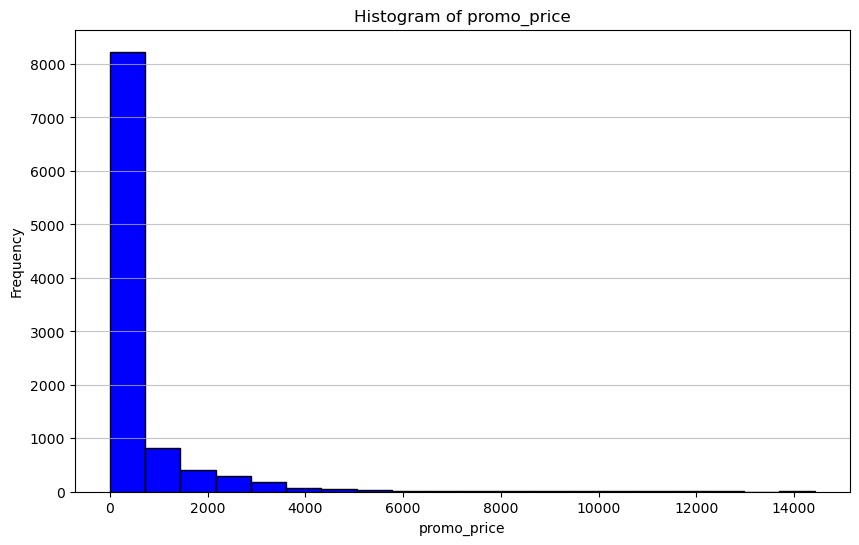

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df_prod_copy_modified['promo_price'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of promo_price')
plt.xlabel('promo_price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [49]:
df_prod_copy_modified_merged = pd.merge(df_prod_copy_modified, df_orderlines_copy[['sku', 'unit_price']], on='sku', how='left')

In [50]:
df_prod_copy_modified_merged['price_unit_difference'] = df_prod_copy_modified_merged['promo_price'] - df_prod_copy_modified_merged['unit_price']

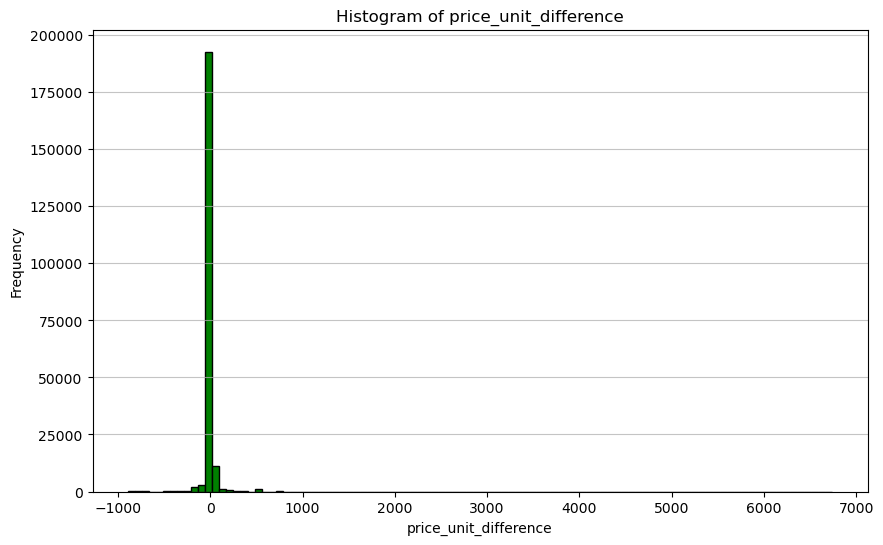

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df_prod_copy_modified_merged['price_unit_difference'], bins=100, color='green', edgecolor='black')
plt.title('Histogram of price_unit_difference')
plt.xlabel('price_unit_difference')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [52]:
df_prod_copy_modified_merged.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,unit_price,price_unit_difference
160304,REP0307,Load Connector Repair iPhone 6 Plus,Repair service including parts and labor for i...,599.906,599.9060,0,"1,44E+11",59.99,539.9160
57020,NTE0093,NewerTech Cable HDMI to HDMI 1.4A 090m,HDMI to HDMI Cable of 09 meters.,11.990,5.9895,0,1325,5.69,0.2995
207257,IFX0181,"Battery iFixit MacBook Pro 13 ""(Mid 2009 to Mi...",Internal Battery for MacBook Pro 13-inch (Mid ...,89.950,79.9900,1,10142,62.04,17.9500
6893,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.000,125.9937,1,12655397,129.99,-3.9963
149097,SEA0098,IronWolf Seagate NAS HDD 10TB SATA 3,NAS hard drive designed for systems with inter...,399.990,274.9943,1,12655397,328.55,-53.5557
42443,APP0927,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.000,13.9900,1,5384,18.99,-5.0000
62063,DLL0016,"Dell UP2715K IPS Monitor 27 ""5K",Monitor 27-inch IPS 5K.,1040.600,899.9895,0,1296,899.99,-0.0005
11545,OWC0043,Mac OWC Memory 8GB 1333MHZ DDR3 SO-DIMM,8GB RAM Mac mini iMac (2010/11) and MacBook Pr...,99.990,99.9896,0,1364,76.99,22.9996
88493,KIN0156,Mac memory Kingston 4GB SO-DIMM DDR3åÊ1333MhzåÊ,4GB RAM iMac (2011) Mac mini and MacBook Pro (...,35.530,42.9913,0,1364,44.99,-1.9987
185661,APP2446,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.330,382.0006,0,21561716,389.00,-6.9994


In [53]:
rows_to_replace = (df_prod_copy_modified_merged['price_unit_difference'] >= -0.5) & (df_prod_copy_modified_merged['price_unit_difference'] < 0)

In [54]:
df_prod_copy_modified_merged.loc[rows_to_replace, 'promo_price'] = df_prod_copy_modified_merged.loc[rows_to_replace, 'unit_price']

In [55]:
df_prod_copy_modified_merged.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,unit_price,price_unit_difference
175975,ELA0037,elago P4 iPad Stand Support Pro / iPad Air Plata,Aluminum support slot Lightning cable for iPad...,60.000,49.9899,0,1216,47.49,2.4999
80809,PHI0062,Philips Hue Dimmer light dimmer switch White,Remote control to control lamps and bulbs Hue,24.950,24.9901,1,11905404,22.41,2.5801
166992,APP1989,Apple iPhone Leather Case Cover Brown Candy,And microfiber leather case for iPhone Premium SE,45.000,42.0003,0,11865403,42.00,0.0003
161668,WAC0231,Wacom Intuos Grip Pen Digital pen 4 / C21,18g pointer 2048 Cintq pressure levels for 21 ...,79.900,71.9902,1,1229,71.99,0.0002
163434,APP1970,Apple iPhone 32GB Space Gray,New iPhone SE with 4-inch screen 32 free GB.,419.000,358.9997,0,51601716,360.33,-1.3303
90353,APP1483,Apple iPhone 64GB Gold,New iPhone SE with 4-inch screen 64 free GB.,549.000,55.0331,0,NaN,538.02,-482.9869
18299,SEV0028,Budget Request repair Apple MacBook Pro,diagnosis to repair MacBook Pro.,199.892,199.8920,0,"1,46E+11",19.99,179.9020
118545,BEL0265,InvisiGlass Belkin Screen Protector Apple Watc...,Tempered glass protector with ultrafine thickn...,19.990,14.9900,1,2425,14.99,-0.0005
7123,WDT0249,"WD Red 6TB 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 6T...,255.000,189.9942,1,12655397,230.99,-40.9958
212457,OTT0194,OtterBox USB Cable Twisted Lightning 1 meter,Cable-duty Lightning to USB 1 meter,24.990,19.9904,1,1230,19.99,0.0004


In [56]:
df_prod_copy_modified_merged['price_unit_difference'] = df_prod_copy_modified_merged['promo_price'] - df_prod_copy_modified_merged['unit_price']

In [57]:
df_prod_copy_modified_merged.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,unit_price,price_unit_difference
33028,SAM0069,256GB Samsung SSD 850 PRO,SSD 256 GB 3D VNAND.,139.99,130.5033,0,12215397,133.58,-3.0767
207214,AP20372,Like new - Apple iPhone 7 Plus 128GB Gold,Refurbished Apple iPhone 7 Plus but like new 1...,889.00,789.0011,0,85651716,789.00,0.0011
206088,OTT0180,OtterBox iPhone Case Etui Symmetry Black 8,Symmetry OtterBox protective sleeve one-piece ...,34.99,22.9900,0,11865403,24.99,-2.0000
75301,APP1192,Magnetic charging cable for Apple Watch (30 cm),Magnetic Cable for Apple Watch load.,35.00,35.0005,1,24215399,35.00,0.0005
143802,SAT0020,Satechi Aluminum Card Reader USB-C to USB 3.0 ...,Card reader with SD slots for SD and USB and M...,34.99,24.9901,1,12585395,24.99,0.0001
171303,GRT0459,Griffin Survivor Case Journey iPhone 6 Plus an...,Cast and impact resistant padded sleeve for iP...,29.99,4.4903,0,11865403,9.99,-5.4997
104240,ADN0042,Adonith Pixel Pointer Black,Bluetooth digital pen tip 19mm for iPhone and ...,74.99,69.9888,1,1229,74.99,-5.0012
213364,LAC0202-A,Open - LaCie d2 Hard Drive 8TB Thunderbolt 2 U...,Reconditioned 8TB external hard drive designed...,489.00,364.7300,0,11935397,364.73,0.0000
33660,GRT0352,Griffin Survivor iPhone Case SE / 5s / 5 black,Ultra Rugged Case for iPhone SE / 5s / 5.,39.99,31.9900,0,11865403,26.44,5.5500
61439,WAC0166,Wacom Intuos Graphics Tablet S Draw with penci...,Small graphics tablet with pen and Art Rage Li...,79.90,69.9900,0,1405,72.99,-3.0000


In [58]:
(df_prod_copy_modified_merged['price_unit_difference'] < 0).sum()

68624

In [59]:
df_prod_copy_modified_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216341 entries, 0 to 216340
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sku                    216341 non-null  object 
 1   name                   216341 non-null  object 
 2   desc                   216330 non-null  object 
 3   price                  216341 non-null  float64
 4   promo_price            216341 non-null  float64
 5   in_stock               216341 non-null  int64  
 6   type                   216137 non-null  object 
 7   unit_price             212726 non-null  float64
 8   price_unit_difference  212726 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 14.9+ MB
